In [3]:
pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.11.0


In [5]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#putting feature variables(independent variables) into X
X = data.drop(['Class'], axis=1)
# Putting target variable(dependent variable) to y
y = data['Class']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
#removes the mean and scales each feature/variable to unit variance
#StandardScaler can be influenced by outliers involves emphirical mean and standard deviation
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
X_train.shape, y_train.shape

((227845, 30), (227845,))

In [13]:
X_test.shape, y_test.shape

((56962, 30), (56962,))

In [14]:
from imblearn.over_sampling import SMOTE
#solves problems that occur when using an imbalanced data set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
#metrics for classification

In [15]:
# Instantiate SMOTE
sm = SMOTE()
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [16]:
from collections import Counter
#to store dictionary keys and their counts

print('Resampled dataset shape %s' % Counter(y_train_smote))
print(X_train_smote.shape)
print(y_train_smote.shape)

Resampled dataset shape Counter({0: 227451, 1: 227451})
(454902, 30)
(454902,)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

In [18]:
ANN_model_smote = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ANN_model_smote.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

In [19]:
ANN_model_smote.fit(X_train_smote, y_train_smote, epochs=50)

Epoch 1/50
14216/14216 [==============================] - 34s 2ms/step - loss: 0.0399 - accuracy: 0.9874
Epoch 2/50
14216/14216 [==============================] - 32s 2ms/step - loss: 0.0110 - accuracy: 0.9976
Epoch 3/50
14216/14216 [==============================] - 30s 2ms/step - loss: 0.0074 - accuracy: 0.9985
Epoch 4/50
14216/14216 [==============================] - 29s 2ms/step - loss: 0.0057 - accuracy: 0.9989
Epoch 5/50
14216/14216 [==============================] - 29s 2ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 6/50
14216/14216 [==============================] - 32s 2ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 7/50
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 8/50
14216/14216 [==============================] - 42s 3ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 9/50
14216/14216 [==============================] - 41s 3ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 10/50
14216/14216 [==============================

In [20]:
def predict(model,x):
    pred  = ANN_model_smote.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,5))
#     cmap = sns.color_palette("viridis", as_cmap=True)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

In [24]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Credit Card Fraud Dection','Credit Card Fraud Dection'], 
                yticklabels=['No Credit Card Fraud Dection','Credit Card Fraud Dection'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ROC_AUC(Y, Y_prob):
    # caculate roc curves
    fpr, tpr, threshold = roc_curve(Y, Y_prob)
    # caculate scores
    model_auc = roc_auc_score(Y, Y_prob)
    # plot roc curve for the model
    plt.figure(figsize=(16, 9))
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Model - AUC=%.3f' % (model_auc))
    # show axis labels and the legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show(block=False)
    return

14216/14216 [==============================] - 24s 2ms/step


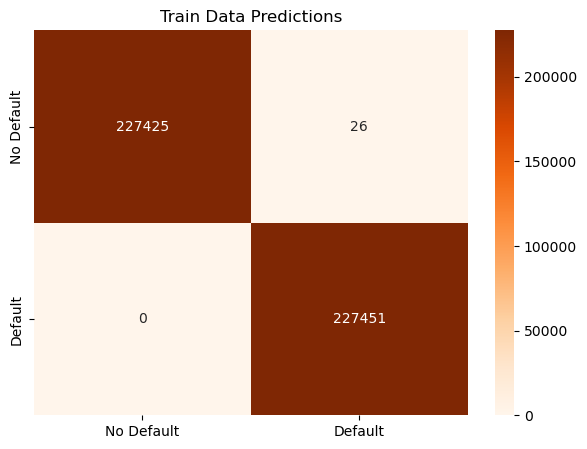



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [21]:
y_train_pred = predict(ANN_model_smote, X_train_smote)
predict_graph(y_train_smote, y_train_pred, 'Train Data Predictions')

In [22]:
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 1.0000
Precision score: 0.9999
F1-Score: 0.9999
Accuracy score: 0.9999
AUC: 0.9999


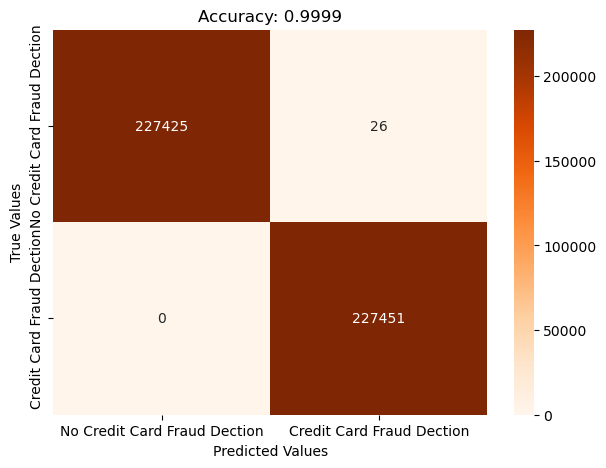



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [26]:
Visualize_confusion_matrix(y_train_smote, y_train_pred)

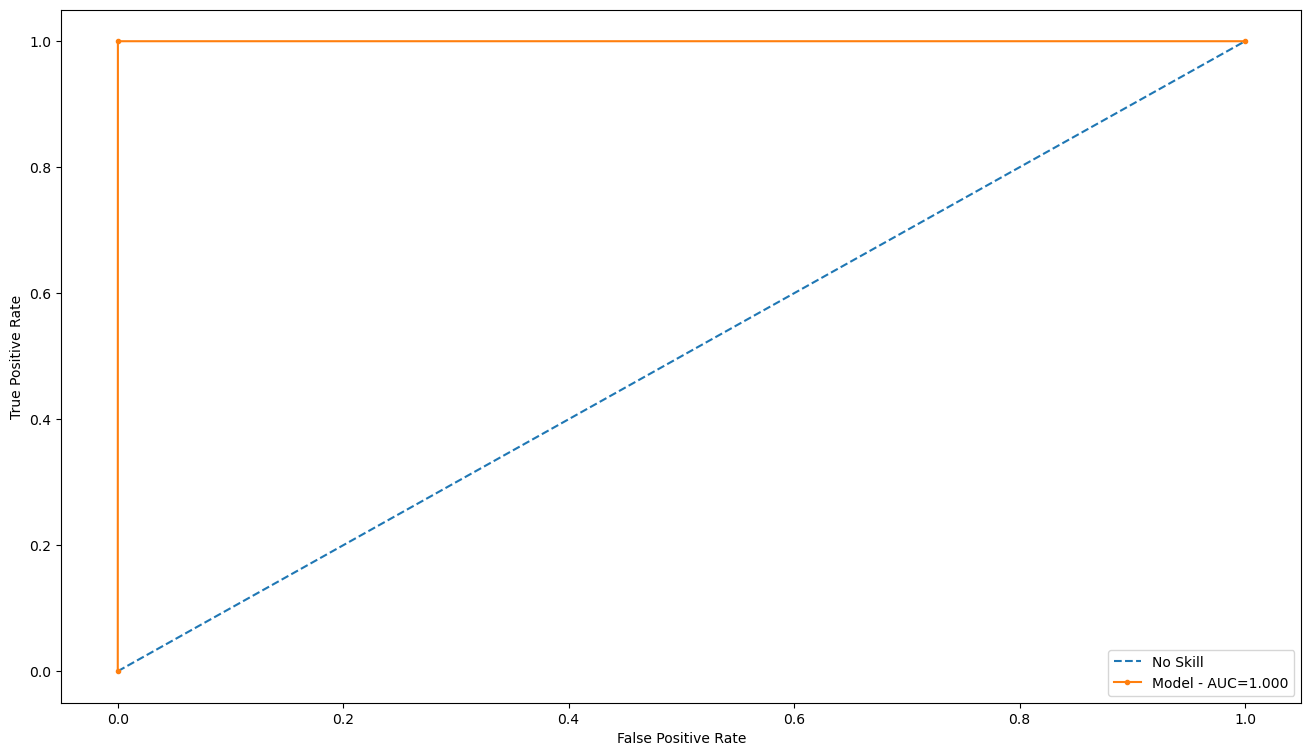

In [27]:
ROC_AUC(y_train_smote, y_train_pred)

In [28]:
y_test_pred = predict(ANN_model_smote, X_test)
acc_smote = accuracy_score(y_test, y_test_pred)

1781/1781 [==============================] - 3s 1ms/step


In [29]:
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.8163
Precision score: 0.7080
F1-Score: 0.7583
Accuracy score: 0.9991
AUC: 0.9079


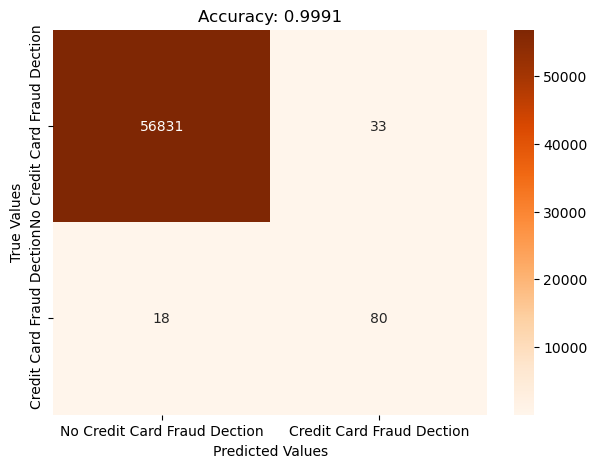



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.82      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [30]:
Visualize_confusion_matrix(y_test, y_test_pred)

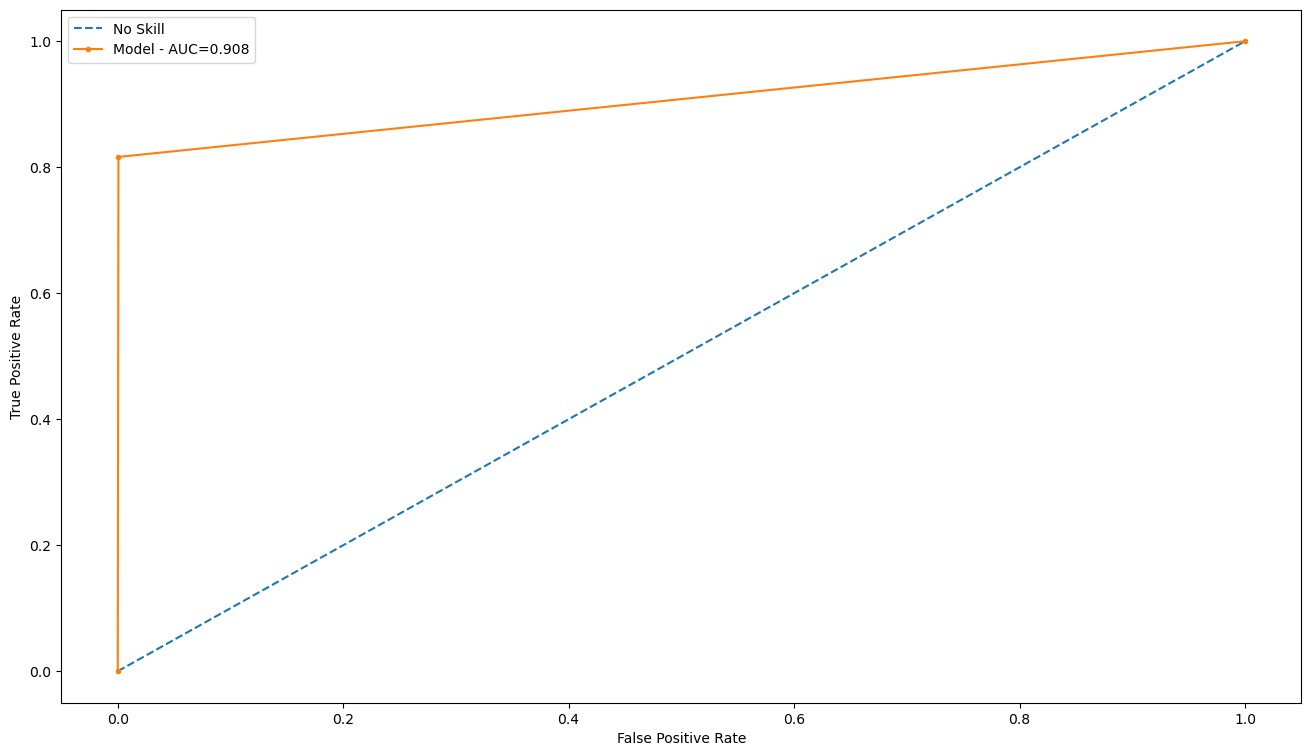

In [31]:
ROC_AUC(y_test, y_test_pred)

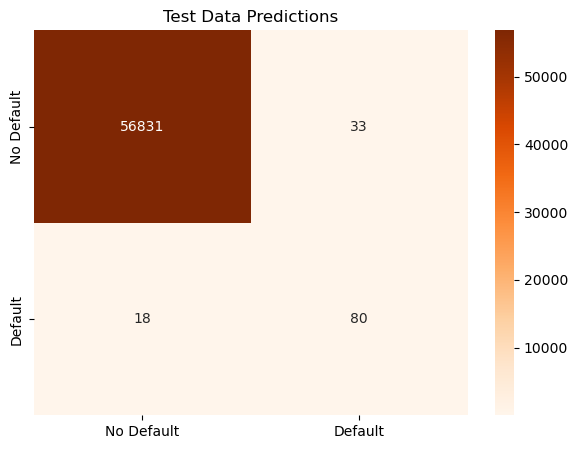



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.82      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [32]:
predict_graph(y_test, y_test_pred, 'Test Data Predictions')